In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("/kaggle/input/us-accidents/US_Accidents_March23.csv")
dfc = df.copy()
dfc.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [3]:
df.duplicated().sum()

0

In [4]:
columns_to_use = ['Severity','Start_Lat','Start_Lng','Street','City','County','State','Visibility(mi)','Sunrise_Sunset']
columns_to_drop = [feature for feature in dfc.columns if feature not in columns_to_use]

dfc.drop(columns=columns_to_drop, inplace=True)
dfc.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'Street', 'City', 'County',
       'State', 'Visibility(mi)', 'Sunrise_Sunset'],
      dtype='object')

In [5]:
dfc['Visibility(mi)'].describe().round(3)

count    7551296.000
mean           9.090
std            2.688
min            0.000
25%           10.000
50%           10.000
75%           10.000
max          140.000
Name: Visibility(mi), dtype: float64

In [6]:
dfc = dfc[dfc["Visibility(mi)"] != 0]
dfc['Visibility(mi)'].describe().round(3)

count    7543617.000
mean           9.100
std            2.674
min            0.060
25%           10.000
50%           10.000
75%           10.000
max          140.000
Name: Visibility(mi), dtype: float64

In [7]:
dfc.isna().sum()

Severity               0
Start_Lat              0
Start_Lng              0
Street             10856
City                 253
County                 0
State                  0
Visibility(mi)    177098
Sunrise_Sunset     23211
dtype: int64

In [8]:
dfc["Visibility(mi)"] = dfc["Visibility(mi)"].fillna(dfc["Visibility(mi)"].mean())
dfc.fillna(method='ffill', limit=3, inplace=True)
dfc.fillna(method='bfill', limit=3, inplace=True)
dfc.dropna(inplace=True)

dfc.isna().sum()

/tmp/ipykernel_42/883723299.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dfc.fillna(method='ffill', limit=3, inplace=True)
/tmp/ipykernel_42/883723299.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dfc.fillna(method='bfill', limit=3, inplace=True)


Severity          0
Start_Lat         0
Start_Lng         0
Street            0
City              0
County            0
State             0
Visibility(mi)    0
Sunrise_Sunset    0
dtype: int64

In [9]:
outlier = ["Start_Lat","Start_Lng"]

for i in outlier:
  # IQR
  # Calc upper and lower limits
  Q_1 = dfc[i].quantile(0.25)
  Q_3 = dfc[i].quantile(0.75)
  IQR = Q_3 - Q_1
  lower = Q_1 - 1.5 * IQR
  upper = Q_3 + 1.5 * IQR

  # Create arrays of Boolean values indicating the outlier
  upper_array = np.where(dfc[i]>=upper)[0]
  lower_array = np.where(dfc[i]<=lower)[0]

  # Remove outlier
  dfc = dfc[~dfc.index.isin(upper_array)]
  dfc = dfc[~dfc.index.isin(lower_array)]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


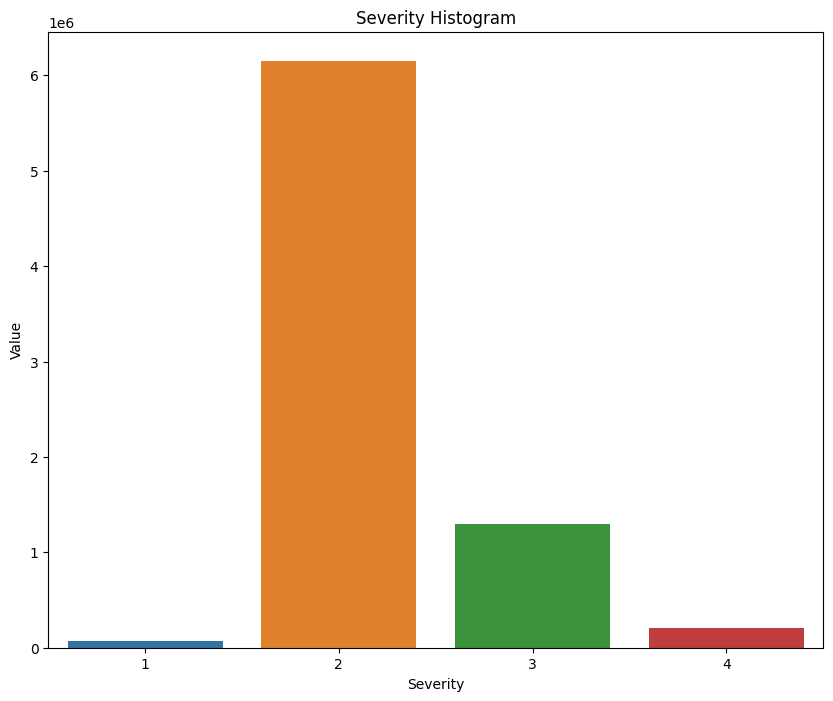

In [10]:
count_severity = dfc["Severity"].value_counts()

plt.figure(figsize=(10, 8))
plt.title("Severity Histogram")
sns.barplot(x=count_severity.index, y=count_severity.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.show()

In [11]:
# Kalau mau di balance tapi jumlah data jadi sedikit

severity1_size = len(dfc[dfc["Severity"] == 1].index)
df_balance = pd.DataFrame()
for i in range(1,5):
    sampled = dfc[dfc["Severity"] == i]
#     df_balance = df_balance.append(sampled.sample(severity1_size, random_state=42))
    df_balance = pd.concat([df_balance, sampled.sample(severity1_size, random_state=42)], ignore_index=True)
df_balance

,Severity,Start_Lat,Start_Lng,Street,City,County,State,Visibility(mi),Sunrise_Sunset
0,1,28.268024,-82.286293,Overpass Rd,Wesley Chapel,Pasco,FL,10.00000,Day
1,1,28.218781,-82.246193,State Road 54,Wesley Chapel,Pasco,FL,10.00000,Night
2,1,33.974037,-118.080109,I-605 S,Whittier,Los Angeles,CA,10.00000,Day
3,1,34.792179,-80.704201,Shiloh Unity Rd,Lancaster,Lancaster,SC,10.00000,Night
4,1,29.504480,-98.584068,Wurzbach Rd,San Antonio,Bexar,TX,10.00000,Day
...,...,...,...,...,...,...,...,...,...
269267,4,38.657213,-78.670448,I-81 S,New Market,Shenandoah,VA,0.25000,Night
269268,4,39.519890,-77.659958,N Main St,Boonsboro,Washington,MD,9.09963,Day
269269,4,36.386347,-119.296709,Road 124,Visalia,Tulare,CA,9.09963,Day
269270,4,42.388609,-83.472191,MI-14 E,Plymouth,Wayne,MI,10.00000,Day


In [12]:
df_balance = dfc.copy()

df_balance.shape

(7720715, 9)

In [13]:
df_balance.head()

,Severity,Start_Lat,Start_Lng,Street,City,County,State,Visibility(mi),Sunrise_Sunset
0,3,39.865147,-84.058723,I-70 E,Dayton,Montgomery,OH,10.0,Night
1,2,39.928059,-82.831184,Brice Rd,Reynoldsburg,Franklin,OH,10.0,Night
2,2,39.063148,-84.032608,State Route 32,Williamsburg,Clermont,OH,10.0,Night
3,3,39.747753,-84.205582,I-75 S,Dayton,Montgomery,OH,9.0,Night
4,2,39.627781,-84.188354,Miamisburg Centerville Rd,Dayton,Montgomery,OH,6.0,Day


In [14]:
from sklearn import preprocessing

columns_to_encoding = ['Street','City','County','State','Visibility(mi)','Sunrise_Sunset']

for i in columns_to_encoding:
    en = preprocessing.LabelEncoder()
    df_balance[i]= en.fit_transform(df_balance[i])

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

In [15]:
df_balance.head()

,Severity,Start_Lat,Start_Lng,Street,City,County,State,Visibility(mi),Sunrise_Sunset
0,3,39.865147,-84.058723,225783,2894,1124,33,46,1
1,2,39.928059,-82.831184,171616,10195,595,33,46,1
2,2,39.063148,-84.032608,306535,13347,347,33,46,1
3,3,39.747753,-84.205582,225810,2894,1124,33,44,1
4,2,39.627781,-84.188354,246337,2894,1124,33,40,0


In [16]:
df_balance.shape

(7720715, 9)

In [17]:
df_balance.dtypes

Severity            int64
Start_Lat         float64
Start_Lng         float64
Street              int64
City                int64
County              int64
State               int64
Visibility(mi)      int64
Sunrise_Sunset      int64
dtype: object

In [18]:
import plotly.express as px
import folium
from folium import plugins
from IPython.display import display

In [ ]:
fig = px.scatter_mapbox(df_balance,
                        lon='Start_Lng',
                        lat='Start_Lat',
                        zoom=5,
                        width=950,
                        color='Severity',
                        size_max=10,
                        height=600,
                        title='Severity Scatter Map',
                        color_discrete_sequence = px.colors.qualitative.Dark24
                       )

fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={"r": 0, "t": 50, "l": 0, "b": 10})
fig.show()

In [ ]:
map_center = [df_balance['Start_Lat'].mean(), df_balance['Start_Lng'].mean()]
n = folium.Map(location=map_center, zoom_start=5)

marker_cluster = plugins.MarkerCluster().add_to(n)

for index, row in df_balance.iterrows():
    folium.CircleMarker(
        location=[row['Start_Lat'], row['Start_Lng']],
        radius=5,
        color=None,
        fill=True,
        fill_color=row['Severity'],
        fill_opacity=0.7,
        popup=row['Severity']
    ).add_to(marker_cluster)

display(n)

In [19]:
y = df_balance['Severity'].copy()
X = df_balance.drop('Severity', axis=1).copy()

In [20]:
y.unique()

array([3, 2, 1, 4])

In [21]:
y = y-1

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [23]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

In [24]:
df_balance.head(3)

,Severity,Start_Lat,Start_Lng,Street,City,County,State,Visibility(mi),Sunrise_Sunset
0,3,39.865147,-84.058723,225783,2894,1124,33,46,1
1,2,39.928059,-82.831184,171616,10195,595,33,46,1
2,2,39.063148,-84.032608,306535,13347,347,33,46,1


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=100)

In [26]:
X_train.shape

(6176572, 8)

In [27]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [28]:
inputs = tf.keras.Input(shape=(X.shape[1],))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

batch_size = 6000
epochs = 100

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau(),
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
824/824 [==============================] - 9s 4ms/step - loss: 0.5665 - accuracy: 0.7958 - val_loss: 0.5413 - val_accuracy: 0.7970 - lr: 0.0010
Epoch 2/100
824/824 [==============================] - 3s 4ms/step - loss: 0.5347 - accuracy: 0.7980 - val_loss: 0.5308 - val_accuracy: 0.7989 - lr: 0.0010
Epoch 3/100
824/824 [==============================] - 3s 4ms/step - loss: 0.5271 - accuracy: 0.7988 - val_loss: 0.5257 - val_accuracy: 0.7987 - lr: 0.0010
Epoch 4/100
824/824 [==============================] - 3s 4ms/step - loss: 0.5230 - accuracy: 0.7991 - val_loss: 0.5247 - val_accuracy: 0.7988 - lr: 0.0010
Epoch 5/100
824/824 [==============================] - 3s 4ms/step - loss: 0.5206 - accuracy: 0.7995 - val_loss: 0.5212 - val_accuracy: 0.7988 - lr: 0.0010
Epoch 6/100
824/824 [==============================] - 3s 4ms/step - loss: 0.5187 - accuracy: 0.7997 - val_loss: 0.5181 - val_accuracy: 0.7994 - lr: 0.0010
Epoch 7/100
824/824 [==============================] - 3s 4ms/st

In [29]:
print("Test Accuracy:", model.evaluate(X_test, y_test, verbose=0)[1])

Test Accuracy: 0.8000178933143616


In [30]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 9156 (35.77 KB)
Trainable params: 9156 (35.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


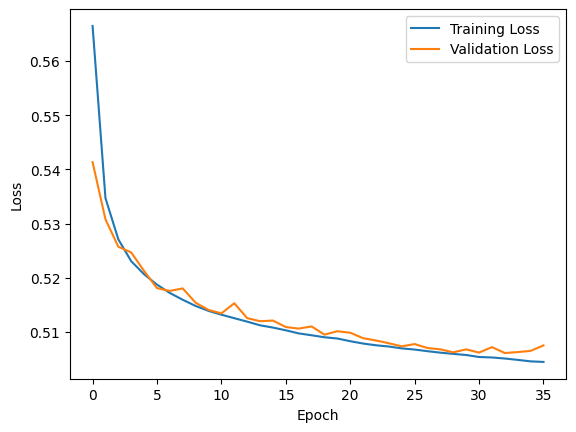

In [31]:
import matplotlib.pyplot as plt

# Plot loss pada set pelatihan dan validasi
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()